# [psd2](https://pypi.org/project/psd2)

A Python module for estimation of power spectral density characteristics using Welch's method

[https://pypi.org/project/psd2](https://pypi.org/project/psd2)

The function `psd2.py` from Python module `psd2` estimates power spectral density characteristics using Welch's method. This function is just a wrap of the scipy.signal.welch function with estimation of some frequency characteristics and a plot.  
The `psd2.py` returns power spectral density data, frequency percentiles of the power spectral density (for example, Fpcntile[50] gives the median power frequency in Hz); mean power frequency; maximum power frequency; total power, and plots power spectral density data.

Let's exemplify the use of `psd2.py`.

## Installation

```bash
pip install psd2
```

Or

```bash
conda install -c duartexyz psd2
```

In [1]:
from psd2 import psd2
help(psd2)

Help on function psd2 in module psd2.psd2:

psd2(x, fs=1.0, window='hanning', nperseg=None, noverlap=None, nfft=None, detrend='constant', show=True, ax=None, scales='linear', xlim=None, units='V')
    Estimate power spectral density characteristics using Welch's method.
    
    This function is just a wrap of the scipy.signal.welch function with
    estimation of some frequency characteristics and a plot. For completeness,
    most of the help from scipy.signal.welch function is pasted here.
    
    Welch's method [1]_ computes an estimate of the power spectral density
    by dividing the data into overlapping segments, computing a modified
    periodogram for each segment and averaging the periodograms.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series in units of Hz. Defaults
        to 1.0.
    window : str or tuple or array_like, optional
        Desired window

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

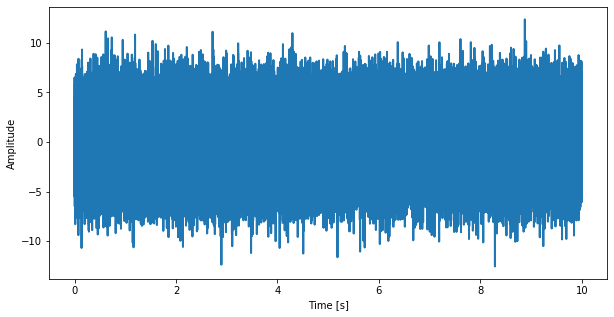

In [3]:
#Generate a test signal, a 2 Vrms sine wave at 1234 Hz, corrupted by
# 0.001 V**2/Hz of white noise sampled at 10 kHz and calculate the PSD:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

plt.figure(figsize=(10, 5))
plt.plot(time, x, linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude');

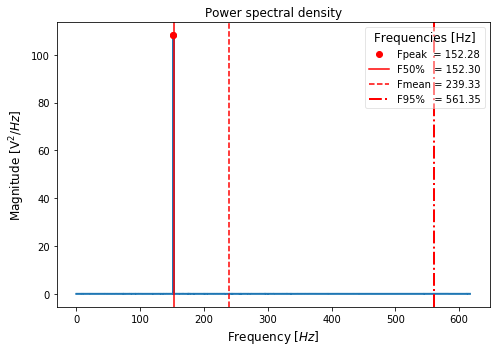

In [4]:
fpcntile, mpf, fmax, Ptotal, f, P = psd2(x, fs=freq)

### Periodogram

In [5]:
import scipy
from scipy import fftpack
freq = 100.0
t = np.arange(0, 5, .01)
y = 2*np.sin(5*np.pi*2*t) + np.sin(2*np.pi*20*t) + np.random.randn(t.size) 
N = y.shape[0]

from scipy import signal, integrate
fp, Pp = signal.periodogram(y, freq, window='boxcar', nfft=N)
fw, Pw = signal.welch(y, freq, window='hanning', nperseg=N, noverlap=0, nfft=N)
# quick and simple PSD
P  = np.abs(fftpack.fft(y-np.mean(y),N))[:int(np.floor(N/2))]**2/N/freq; P[1:-1]=2*P[1:-1]
fs = np.linspace(0,freq/2,len(P))

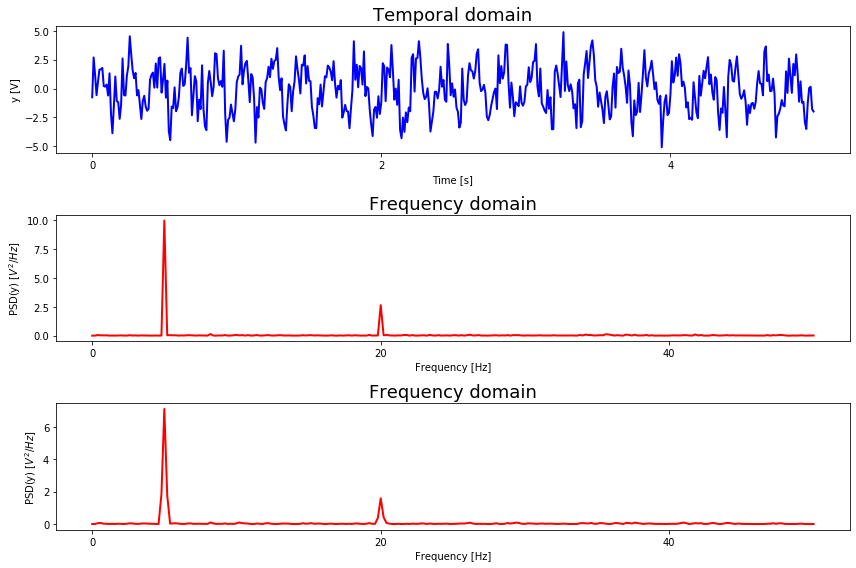

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, squeeze=True, figsize=(12, 8))
ax1.set_title('Temporal domain', fontsize=18);
ax1.plot(t, y, 'b', linewidth=2)
ax1.set_xlabel('Time [s]'); ax1.set_ylabel('y [V]'); 
ax1.locator_params(axis = 'both', nbins = 5);
ax2.set_title('Frequency domain', fontsize=18);
ax2.plot(fp, Pp,'r',  linewidth=2)
ax2.set_xlabel('Frequency [Hz]'); ax2.set_ylabel('PSD(y) $[V^2/Hz]$');
ax2.locator_params(axis = 'both', nbins = 5);
ax3.set_title('Frequency domain', fontsize=18);
ax3.plot(fw, Pw,'r',  linewidth=2)
ax3.set_xlabel('Frequency [Hz]'); ax3.set_ylabel('PSD(y) $[V^2/Hz]$');
ax3.locator_params(axis = 'both', nbins = 5);
fig.tight_layout()

In [7]:
F, P = signal.welch(y, fs=freq, window='hanning', nperseg=N/2, noverlap=N/4, nfft=N/2)
A = integrate.cumtrapz(P, F)
fm = np.trapz(F * P, F)/np.trapz(P, F)
f50 = F[np.nonzero(A >= 0.5*A[-1])[0][0]]
f95 = F[np.nonzero(A >= .95*A[-1])[0][0]]
fmax = F[np.argmax(P)]

$$ F_{mean} = \frac{ \sum_{i=1}^{N} F_i*P_i }{ \sum_{i=1}^{N} P_i } $$

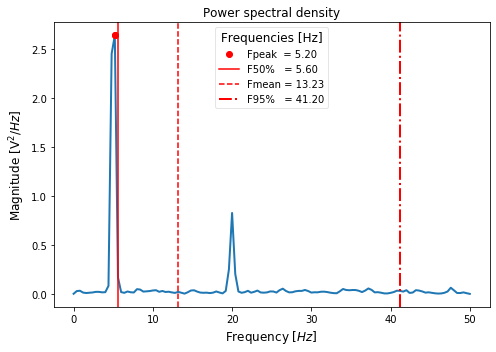

In [8]:
from psd2 import psd2
fp, mf, fmax, Ptot, F, P = psd2(y, fs=freq, scales='linear', units='V')